In [2]:
from torch.utils.data import Dataset

# Create a toy dataset
class NumberProductDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = self.numbers[index]
        number2 = self.numbers[index] + 1
        return (number1, number2), number1 * number2

    def __len__(self):
        return len(self.numbers)

In [17]:
from torch.utils.data import DataLoader

# Instantiate the dataset
dataset = NumberProductDataset(data_range=(0, 5))

# Create a DataLoader instance
dataloader = DataLoader(dataset, batch_size=2, shuffle=False)

# Iterating over batches
for (num_pairs, products) in dataloader:
    print(num_pairs, products)
# [tensor([4, 3, 1]), tensor([5, 4, 2])] tensor([20, 12, 2])
# [tensor([2, 0]), tensor([3, 1])] tensor([6, 0])

[tensor([1, 2]), tensor([2, 3])] tensor([2, 6])
[tensor([3, 4]), tensor([4, 5])] tensor([12, 20])
[tensor([5]), tensor([6])] tensor([30])


In [20]:
import torch

torch.randint(0, 10, (64,))

# Set the device to be used for the tensor
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create a tensor on the appropriate device
my_tensor = torch.rand(3, 3)

# Print the tensor
print(my_tensor)

tensor([[0.7160, 0.9065, 0.2721],
        [0.8914, 0.2732, 0.9814],
        [0.2125, 0.7976, 0.5897]])


In [21]:
assert my_tensor.device.type in {"cuda", "cpu"}
assert my_tensor.shape == (3, 3)

print("Success!")

Success!


### Neural Net Constructor Kit `torch.nn`

In [22]:
import torch.optim as optim
import torch.nn as nn


class MyMLP(nn.Module):
    """My Multilayer Perceptron (MLP)

    Specifications:

        - Input layer: 784 neurons
        - Hidden layer: 128 neurons with ReLU activation
        - Output layer: 10 neurons with softmax activation

    """

    def __init__(self):
        super(MyMLP, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass the input to the second layer
        x = self.fc1(x)

        # Apply ReLU activation
        x = self.relu(x)

        # Pass the result to the final layer
        x = self.fc2(x)

        # Apply softmax activation
        x = self.softmax(x)

        return x


my_mlp = MyMLP()
print(my_mlp)

MyMLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


In [23]:
# Check the number of inputs
assert my_mlp.fc1.in_features == 784

# Check the number of outputs
assert my_mlp.fc2.out_features == 10

assert my_mlp.fc2.in_features == 128

# Check the number of nodes in the hidden layer
assert my_mlp.fc1.out_features == 128

# Check that my_mlp.fc1 is a fully connected layer
assert isinstance(my_mlp.fc1, nn.Linear)

# Check that my_mlp.fc2 is a fully connected layer
assert isinstance(my_mlp.fc2, nn.Linear)

In [24]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer (by convention we use the variable optimizer)
optimizer = optim.SGD(my_mlp.parameters(), lr=0.01)

In [25]:
assert isinstance(
    loss_fn, nn.CrossEntropyLoss
), "loss_fn should be an instance of CrossEntropyLoss"
assert isinstance(optimizer, torch.optim.SGD), "optimizer should be an instance of SGD"
assert optimizer.defaults["lr"] == 0.01, "learning rate should be 0.01"
assert optimizer.param_groups[0]["params"] == list(
    my_mlp.parameters()
), "optimizer should be passed the MLP parameters"

In [26]:
def fake_training_loaders():
    for _ in range(30):
        yield torch.randn(64, 784), torch.randint(0, 10, (64,))


for epoch in range(3):
    # Create a training loop
    for i, data in enumerate(fake_training_loaders()):
        # Every data instance is an input + label pair
        x, y = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Forward pass (predictions)
        y_pred = my_mlp(x)

        # Compute the loss and its gradients
        loss = loss_fn(y_pred, y)
        # calculate the gradients of all the parameters with respect to the loss
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        if i % 10 == 0:
            print(f"Epoch {epoch}, batch {i}: {loss.item():.5f}")

Epoch 0, batch 0: 2.30338
Epoch 0, batch 10: 2.30353
Epoch 0, batch 20: 2.30262
Epoch 1, batch 0: 2.30108
Epoch 1, batch 10: 2.29741
Epoch 1, batch 20: 2.30323
Epoch 2, batch 0: 2.29626
Epoch 2, batch 10: 2.30401
Epoch 2, batch 20: 2.29852


In [28]:
assert abs(loss.item() - 2.3) < 0.1, "the loss should be around 2.3 with random data"

AssertionError: the loss should be around 2.3 with random data

## HuggingFace

In [3]:
# Get the model and tokenizer

from transformers import AutoModelForSequenceClassification, AutoTokenizer

pt_model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")


def get_prediction(review):
    """Given a review, return the predicted sentiment"""

    # Tokenize the review
    # (Get the response as tensors and not as a list)
    inputs = tokenizer(review, return_tensors="pt")

    # Perform the prediction (get the logits)
    outputs = pt_model(**inputs)

    # Get the predicted class (corresponding to the highest logit)
    predictions = torch.argmax(outputs.logits, dim=-1)

    return "positive" if predictions.item() == 1 else "negative"

In [ ]:
review = "This movie is not so great :("

print(f"Review: {review}")
print(f"Sentiment: {get_prediction(review)}")

assert get_prediction(review) == "negative", "The prediction should be negative"


review = "This movie rocks!"

print(f"Review: {review}")
print(f"Sentiment: {get_prediction(review)}")

assert get_prediction(review) == "positive", "The prediction should be positive"

Review: This movie is not so great :(


In [1]:
from datasets import load_dataset

# Load the test split of the imdb dataset
dataset = load_dataset("imdb", split="test")

dataset

/Users/yanyan/personal-github/workspace-udacity/generative-ai-nanodegree/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [2]:
from pprint import pprint

from datasets import Dataset

assert isinstance(dataset, Dataset), "The dataset should be a Dataset object"
assert set(dataset.features.keys()) == {
    "label",
    "text",
}, "The dataset should have a label and a text feature"

# Show the first example
pprint(dataset[0])

{'label': 0,
 'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV '
         'are usually underfunded, under-appreciated and misunderstood. I '
         'tried to like this, I really did, but it is to good TV sci-fi as '
         'Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap '
         "cardboard sets, stilted dialogues, CG that doesn't match the "
         'background, and painfully one-dimensional characters cannot be '
         "overcome with a 'sci-fi' setting. (I'm sure there are those of you "
         "out there who think Babylon 5 is good sci-fi TV. It's not. It's "
         'clichéd and uninspiring.) While US viewers might like emotion and '
         'character development, sci-fi is a genre that does not take itself '
         'seriously (cf. Star Trek). It may treat important issues, yet not as '
         "a serious philosophy. It's really difficult to care about the "
         'characters here as they are not simply foolish, ju

In [ ]:
# Get the last 3 reviews
reviews = dataset["text"][-3:]

# Get the last 3 labels
labels = dataset["label"][-3:]

# Check
for review, label in zip(reviews, labels):
    # Let's use your get_prediction function to get the sentiment
    # of the review!
    prediction = get_prediction(review)

    print(f"Review: {review[:80]} \n... {review[-80:]}")
    print(f'Label: {"positive" if label else "negative"}')
    print(f"Prediction: {prediction}\n")

## Steps

1. Load the Fashion-MNIST dataset using the torchvision package.
2. Define a PyTorch model using the MobileNetV3 architecture.
3. Train the model on the Fashion-MNIST dataset.
4. Evaluate the model on the test set.

In [3]:
# Load the Fashion-MNIST dataset

import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms


def load_data(batch_size, data_dir="data"):
    """Load the Fashion-MNIST dataset."""

    # Define transforms to normalize the data
    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
    )

    # Download and load the training data
    trainset = datasets.FashionMNIST(
        data_dir, download=True, train=True, transform=transform
    )
    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=batch_size, shuffle=True
    )

    # Download and load the test data
    testset = datasets.FashionMNIST(
        data_dir, download=True, train=False, transform=transform
    )
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=batch_size, shuffle=True
    )

    return trainloader, testloader


trainloader, testloader = load_data(64)

100%|██████████| 26.4M/26.4M [00:23<00:00, 1.14MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 267kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 4.03MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 17.6MB/s]


In [5]:
# Define some helper functions to helps with the labels
def get_class_names():
    """Return the list of classes in the Fashion-MNIST dataset."""
    return [
        "T-shirt/top",
        "Trouser",
        "Pullover",
        "Dress",
        "Coat",
        "Sandal",
        "Shirt",
        "Sneaker",
        "Bag",
        "Ankle boot",
    ]


def get_class_name(class_index):
    """Return the class name for the given index."""
    return get_class_names()[class_index]


def get_class_index(class_name):
    """Return the class index for the given name."""
    return get_class_names().index(class_name)


for class_index in range(10):
    print(f"class_index={class_index}, class_name={get_class_name(class_index)}")

class_index=0, class_name=T-shirt/top
class_index=1, class_name=Trouser
class_index=2, class_name=Pullover
class_index=3, class_name=Dress
class_index=4, class_name=Coat
class_index=5, class_name=Sandal
class_index=6, class_name=Shirt
class_index=7, class_name=Sneaker
class_index=8, class_name=Bag
class_index=9, class_name=Ankle boot


Matplotlib is building the font cache; this may take a moment.


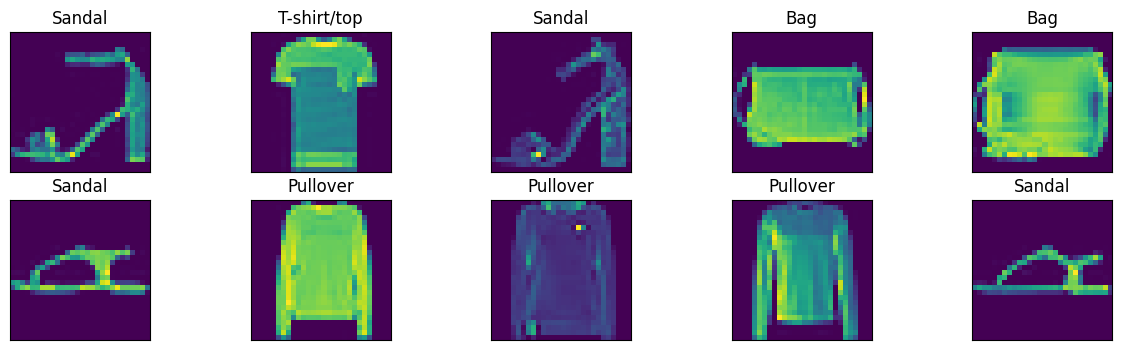

In [6]:
# Show 10 images from the training set with their labels

import matplotlib.pyplot as plt
import numpy as np


# function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()  # convert from tensor to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # transpose dimensions


images, labels = next(iter(trainloader))  # get the first batch

# show images with labels
fig = plt.figure(figsize=(15, 4))
plot_size = 10

for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size // 2, idx + 1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(get_class_name(int(labels[idx])))

The `torchvision.models.mobilenet_v3_large` class provides access to pre-trained MobileNetV3 model. We can use the model and replace the final layer with a fully-connected layer with 10 outputs since we have 10 classes. We can then freeze the weights of the convolutional layers and train only the new fully-connected layer.

In [7]:
# Load a pre-trained MobileNetV3 and inspect its structure
import torchvision.models as models

mobilenet_v3_model = models.mobilenet_v3_small(pretrained=True)
print(mobilenet_v3_model)

/Users/yanyan/personal-github/workspace-udacity/generative-ai-nanodegree/.venv/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/yanyan/personal-github/workspace-udacity/generative-ai-nanodegree/.venv/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /Users/yanyan/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


100%|██████████| 9.83M/9.83M [00:00<00:00, 12.2MB/s]

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

Take note of the classifier section of the model.
```
  (classifier): Sequential(
    (0): Linear(in_features=576, out_features=1024, bias=True)
    (1): Hardswish()
    (2): Dropout(p=0.2, inplace=True)
    (3): Linear(in_features=1024, out_features=1000, bias=True)
  )
```
There are 1000 output features, but our dataset does not have that many. See if you can complete the next cell so that it has the right number of output nodes.

In [8]:
import torch.nn.functional as F
import torchvision.models as models
from torch import nn


# Define a model class that extends the nn.Module class
class MobileNetV3(nn.Module):
    def __init__(self):
        super(MobileNetV3, self).__init__()

        # Load the pre-trained MobileNetV3 (Small) architecture
        self.model = models.mobilenet_v3_small(pretrained=True)

        # Replace the last fully-connected layer with a new one of the right size: 10
        self.model.classifier[3] = nn.Linear(in_features=1024, out_features=10)

        # Freeze all the weights of the network except for the last fully-connected layer
        self.freeze()

    def forward(self, x):
        # Convert 1x28x28 input tensor to 3x28x28 tensor, to convert it to a color image
        x = x.repeat(1, 3, 1, 1)

        # Resize the input to 224x224, since MobileNetV3 (Small) expects images of that size
        if x.shape[2:] != (224, 224):
            x = F.interpolate(x, size=(224, 224), mode="bilinear", align_corners=False)

        # Forward pass
        return self.model(x)

    def freeze(self):
        # Freeze all the weights of the network except for the last fully-connected layer
        for param in self.model.parameters():
            param.requires_grad = False

        # Unfreeze the final layer
        for param in self.model.classifier[3].parameters():
            param.requires_grad = True

    def unfreeze(self):
        # Unfreeze all the weights of the network
        for param in self.model.parameters():
            param.requires_grad = True


# Create an instance of the MobileNetV3 model
model = MobileNetV3()
print(model)

MobileNetV3(
  (model): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
            (activation): ReLU()
            (scale_activation): Hardsigmoid()
          )
          (2): Conv2d

We can train the model using the standard PyTorch training loop. For the loss function, we'll use CrossEntropyLoss. We also use the Adam optimizer with a learning rate of 0.002. We train the model for 1 epoch so we can see how the model performs after just one pass of the training data.

In [10]:
import torch
import torch.nn as nn

# Define the loss function and optimizer

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

Now let's choose our device automatically (CPU, GPU, or MPS) and write our training loop!

The MPS backend is for M1/M2/etc Macs.

If you are having any errors running the code locally, you should try to use the cpu mode manually, i.e. `device = torch.device("cpu")`

In [11]:
# Set the device as GPU, MPS, or CPU according to availability
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

Using device: mps


In [12]:
# Create a PyTorch training loop

model = model.to(device)  # Move the model weights to the device

epochs = 1
for epoch in range(epochs):
    for batch_num, (images, labels) in enumerate(trainloader):
        # Move tensors to the device
        images = images.to(device)
        labels = labels.to(device)

        # Zero out the optimizer's gradient buffer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate the loss and perform backprop
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Update the weights
        optimizer.step()

        # Print the loss for every 100th iteration
        if (batch_num) % 100 == 0:
            print(
                "Epoch [{}/{}], Batch [{}/{}], Loss: {:.4f}".format(
                    epoch + 1, epochs, batch_num + 1, len(trainloader), loss.item()
                )
            )

Epoch [1/1], Batch [1/938], Loss: 2.3231
Epoch [1/1], Batch [101/938], Loss: 0.6304
Epoch [1/1], Batch [201/938], Loss: 0.3854
Epoch [1/1], Batch [301/938], Loss: 0.4560
Epoch [1/1], Batch [401/938], Loss: 0.3633
Epoch [1/1], Batch [501/938], Loss: 0.3507
Epoch [1/1], Batch [601/938], Loss: 0.5381
Epoch [1/1], Batch [701/938], Loss: 0.4732
Epoch [1/1], Batch [801/938], Loss: 0.2691
Epoch [1/1], Batch [901/938], Loss: 0.4994


We evaluate the model on the test set by:

printing the accuracy
plotting a few examples of correct and incorrect predictions.

In [25]:
# Print the loss and accuracy on the test set
correct = 0
total = 0
loss = 0

for images, labels in testloader:
    # Move tensors to the configured device
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss += loss_fn(outputs, labels)

    # torch.max return both max and argmax. We get the argmax here.
    _, predicted = torch.max(outputs.data, 1)

    # print("---predicted---")
    # print(predicted)
    # predicted2 = torch.argmax(outputs.data, dim=-1)
    # print("---predicted2---")
    # print(predicted2)


    # Compute the accuracy
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(
    "Test Accuracy of the model on the test images: {} %".format(100 * correct / total)
)
print("Test Loss of the model on the test images: {}".format(loss))

KeyboardInterrupt: 

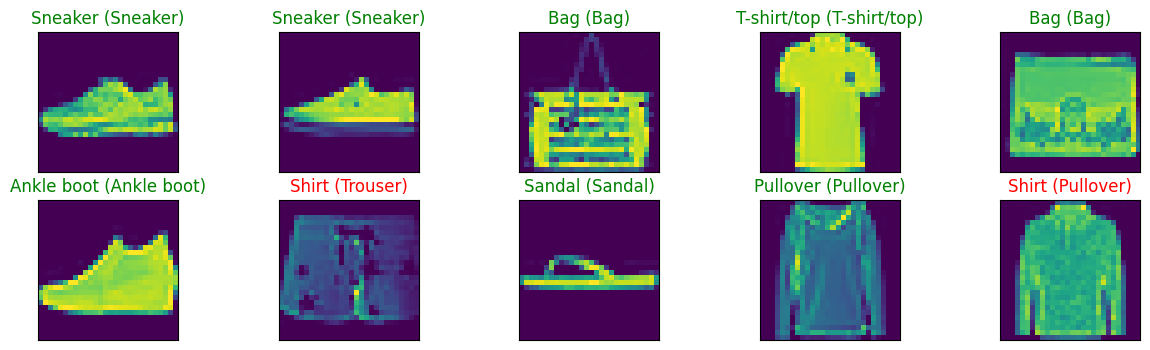

In [22]:
# Plotting a few examples of correct and incorrect predictions

import matplotlib.pyplot as plt
import numpy as np

# Get the first batch of images and labels
images, labels = next(iter(testloader))

# Move tensors to the configured device
images = images.to(device)
labels = labels.to(device)

# Forward pass
outputs = model(images)
_, predicted = torch.max(outputs.data, 1)

# Plot the images with labels, at most 10
fig = plt.figure(figsize=(15, 4))

for idx in np.arange(min(10, len(images))):
    ax = fig.add_subplot(2, 10 // 2, idx + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images.cpu()[idx]))
    ax.set_title(
        "{} ({})".format(get_class_name(predicted[idx]), get_class_name(labels[idx])),
        color=("green" if predicted[idx] == labels[idx] else "red"),
    )